In [1]:
import numpy as np
import matplotlib.pyplot as plt
import eispac
import sunpy 
import sunpy.map
import cmcrameri.cm as cmcm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import AutoLocator, AutoMinorLocator, FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter
from scipy.io import readsav
from copy import deepcopy

In [2]:
def plot_colorbar(im, ax, width="3%", height="100%",loc="lower left",fontsize=14,
                  bbox_to_anchor=(1.02, 0., 1, 1)):
    clb_ax = inset_axes(ax,width=width,height=height,loc=loc,
                bbox_to_anchor=bbox_to_anchor,
                 bbox_transform=ax.transAxes,
                 borderpad=0)
    clb = plt.colorbar(im,pad = 0.05,orientation='vertical',ax=ax,cax=clb_ax)
    clb_ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    clb_ax.yaxis.get_offset_text().set_fontsize(fontsize)
    clb_ax.tick_params(labelsize=fontsize)
    return clb, clb_ax

In [3]:
data_filepath = "../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.data.h5"

In [4]:
fe_12_195_1c_fitpath = "../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.fe_12_195_119.1c-0.fit.h5"
fe_13_202_1c_fitpath = "../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.fe_13_202_044.1c-0.fit.h5"
fe_10_184_1c_fitpath = "../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.fe_10_184_536.1c-0.fit.h5"
o__06_184_1c_fitpath = "../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.o__06_184_117.1c-0.fit.h5"
fe_08_185_1c_fitpath = "../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.fe_08_185_213.1c-0.fit.h5"
fe_09_197_1c_fitpath = "../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.fe_09_197_862.1c-0.fit.h5"
si_10_258_1c_fitpath = "../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.si_10_258_375.1c-0.fit.h5"
si_10_261_1c_fitpath = "../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.si_10_261_058.1c-0.fit.h5"
fe_14_264_1c_fitpath = "../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.fe_14_264_787.1c-0.fit.h5"
si_07_275_1c_fitpath = "../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.si_07_275_368.1c-0.fit.h5"
mg_07_276_1c_fitpath = "../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.mg_07_276_153.1c-0.fit.h5"
mg_07_280_1c_fitpath = "../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.mg_07_280_737.1c-0.fit.h5"

In [5]:
def plot_dhb_int_and_vel(fit_file, return_map=False,vmin=-10,vmax=10,corr="column",rest_wave=None):
    fit_res = eispac.read_fit(fit_file)
    fit_res.calculate_velocity(corr_method=corr,rest_wave=rest_wave)
    int_map = fit_res.get_map(component=0, measurement="intensity")
    vel_map = fit_res.get_map(component=0, measurement="vel")
    
    vel_map.plot_settings["norm"] = plt.Normalize(vmin=vmin,vmax=vmax)

    fig = plt.figure(figsize=(7,5),layout="constrained")

    ax1 = fig.add_subplot(121, projection=int_map)
    int_map.plot(axes=ax1)
    plot_colorbar(ax=ax1,im=ax1.images[0], width="8%",bbox_to_anchor=(1.06, 0., 1, 1),fontsize=10)
    ax1.set_title(" ".join(int_map.name.split(" ")[2:6]))

    ax2 = fig.add_subplot(122, projection=vel_map)
    vel_map.plot(axes=ax2)
    plot_colorbar(ax=ax2,im=ax2.images[0], width="8%",bbox_to_anchor=(1.06, 0., 1, 1),fontsize=10)
    ax2.set_title(" ".join(int_map.name.split(" ")[2:6]))

    if return_map:
        return int_map, vel_map

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.fe_12_195_119.1c-0.fit.h5


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


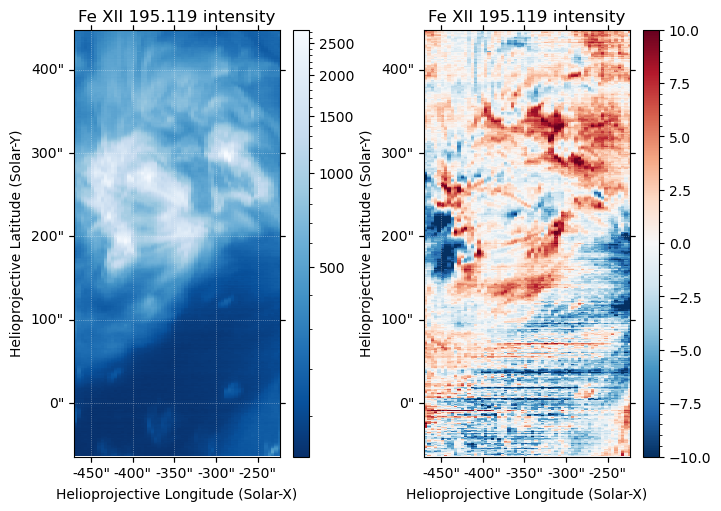

In [6]:
fe_12_195_int_map, fe_12_195_vel_map = plot_dhb_int_and_vel(fe_12_195_1c_fitpath, return_map=True)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.fe_13_202_044.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


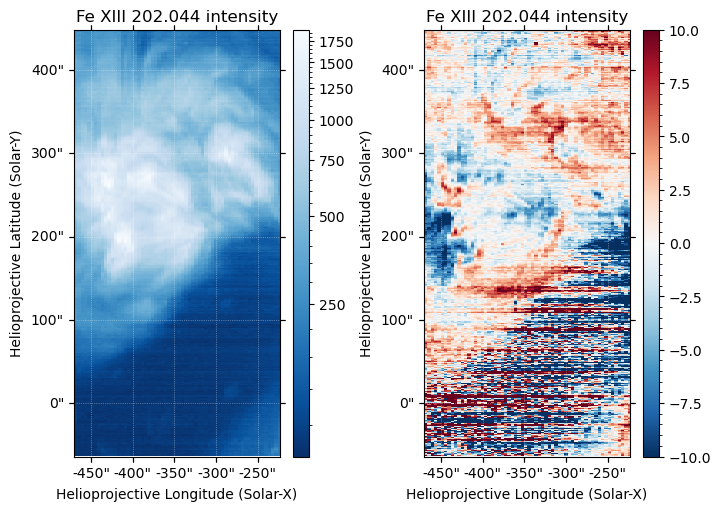

In [7]:
plot_dhb_int_and_vel(fe_13_202_1c_fitpath)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.fe_10_184_536.1c-0.fit.h5


/home/yjzhu/anaconda3/envs/sunpy/lib/python3.11/site-packages/eispac/core/eisfitresult.py:427: RuntimeWarning: invalid value encountered in divide
  rel_error = obs_errs/obs_cent


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


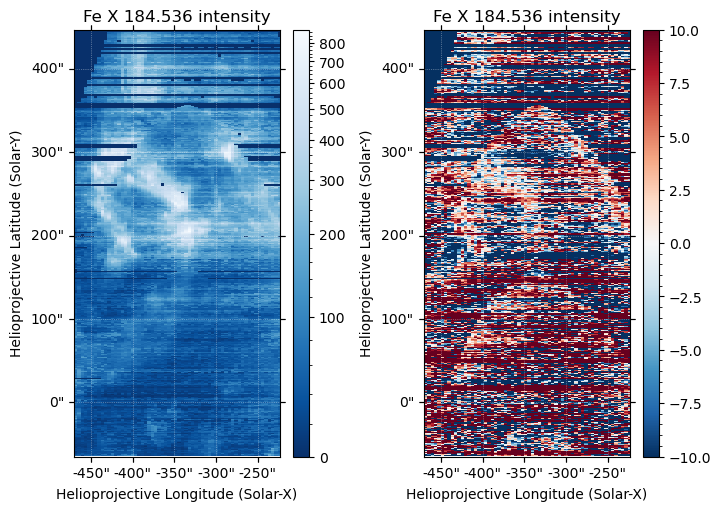

In [8]:
fe_10_184_intmap, fe_10_184_velmap = plot_dhb_int_and_vel(fe_10_184_1c_fitpath, return_map=True)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.o__06_184_117.1c-0.fit.h5


/home/yjzhu/anaconda3/envs/sunpy/lib/python3.11/site-packages/eispac/core/eisfitresult.py:427: RuntimeWarning: invalid value encountered in divide
  rel_error = obs_errs/obs_cent


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


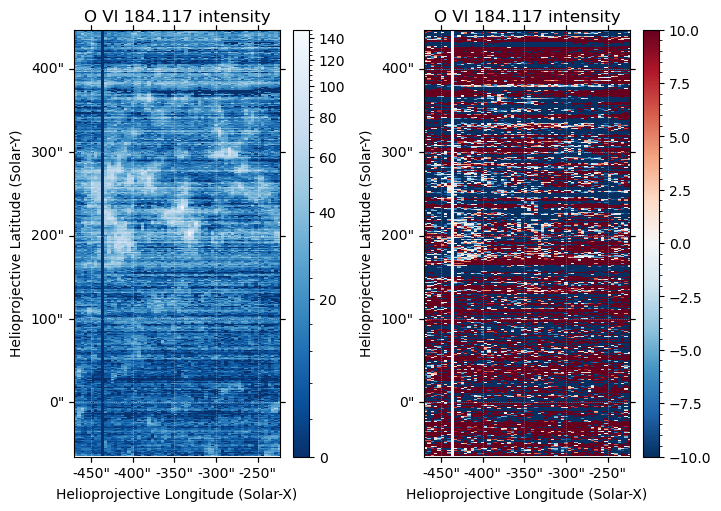

In [9]:
plot_dhb_int_and_vel(o__06_184_1c_fitpath)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.fe_08_185_213.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


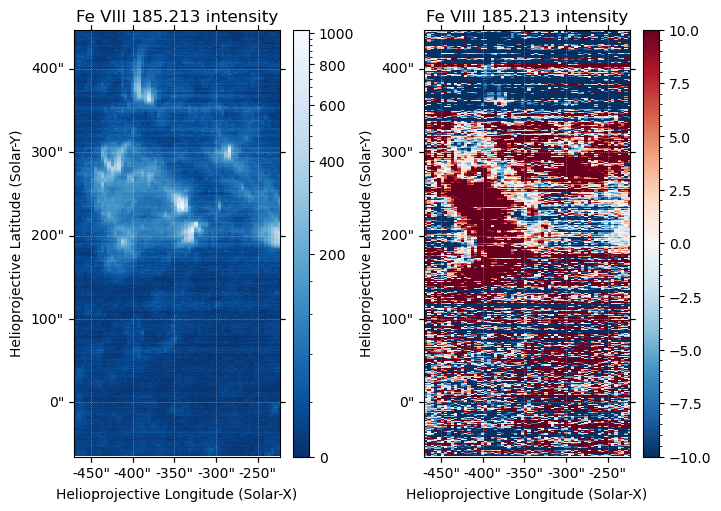

In [10]:
fe_08_185_intmap, fe_08_185_velmap = plot_dhb_int_and_vel(fe_08_185_1c_fitpath,corr="column", return_map=True)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.fe_09_197_862.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


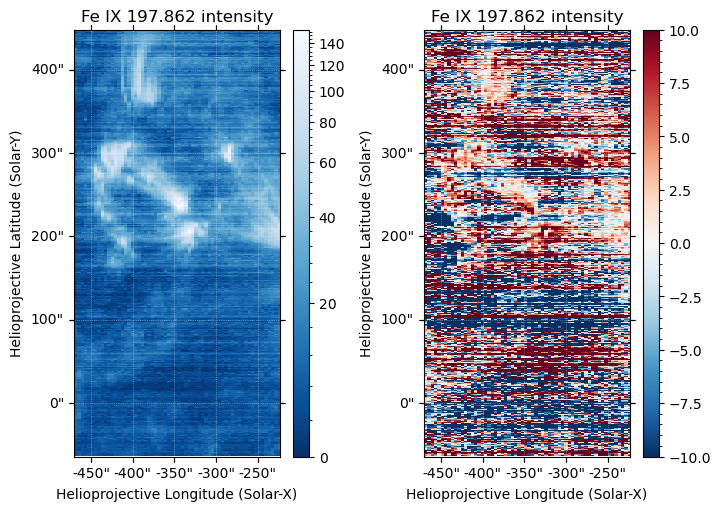

In [11]:
fe_09_197_intmap, fe_09_197_velmap = plot_dhb_int_and_vel(fe_09_197_1c_fitpath, return_map=True)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.si_10_258_375.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


/home/yjzhu/anaconda3/envs/sunpy/lib/python3.11/site-packages/eispac/core/eisfitresult.py:427: RuntimeWarning: invalid value encountered in divide
  rel_error = obs_errs/obs_cent


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


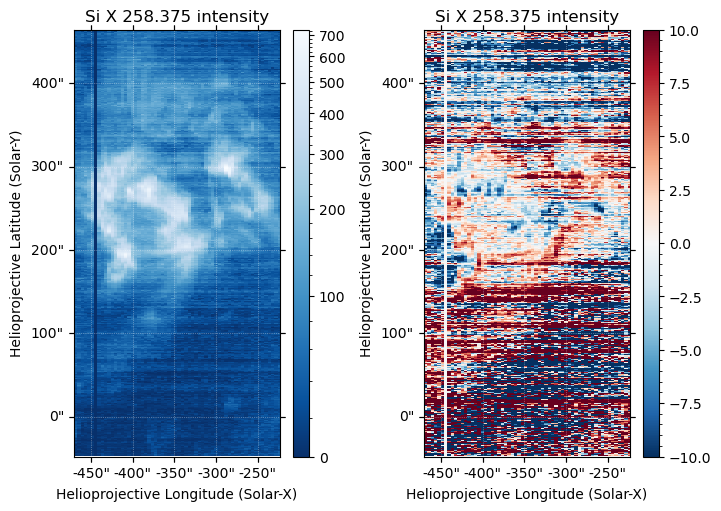

In [12]:
plot_dhb_int_and_vel(si_10_258_1c_fitpath)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.si_10_261_058.1c-0.fit.h5


/home/yjzhu/anaconda3/envs/sunpy/lib/python3.11/site-packages/eispac/core/eisfitresult.py:427: RuntimeWarning: invalid value encountered in divide
  rel_error = obs_errs/obs_cent


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


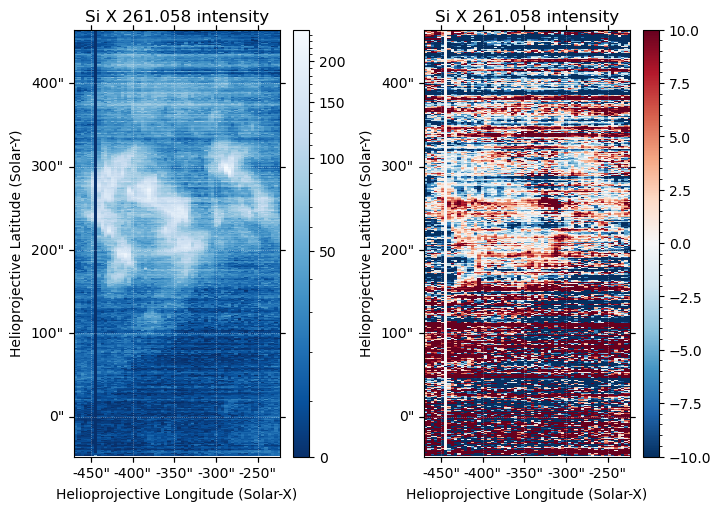

In [13]:
plot_dhb_int_and_vel(si_10_261_1c_fitpath)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.fe_14_264_787.1c-0.fit.h5


/home/yjzhu/anaconda3/envs/sunpy/lib/python3.11/site-packages/eispac/core/eisfitresult.py:427: RuntimeWarning: invalid value encountered in divide
  rel_error = obs_errs/obs_cent


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


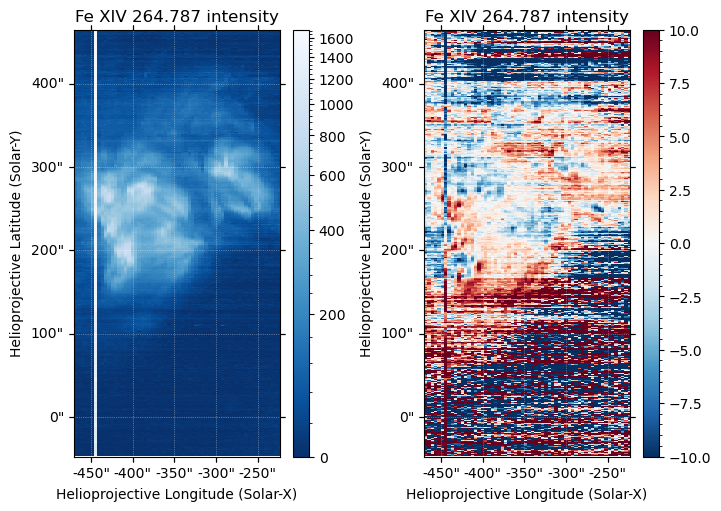

In [14]:
plot_dhb_int_and_vel(fe_14_264_1c_fitpath)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.si_07_275_368.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


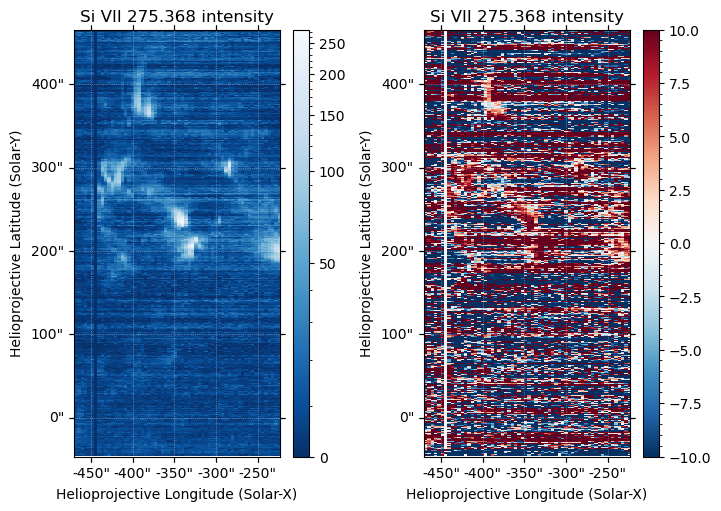

In [15]:
plot_dhb_int_and_vel(si_07_275_1c_fitpath)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.mg_07_276_153.1c-0.fit.h5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


/home/yjzhu/anaconda3/envs/sunpy/lib/python3.11/site-packages/eispac/core/eisfitresult.py:427: RuntimeWarning: invalid value encountered in divide
  rel_error = obs_errs/obs_cent


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


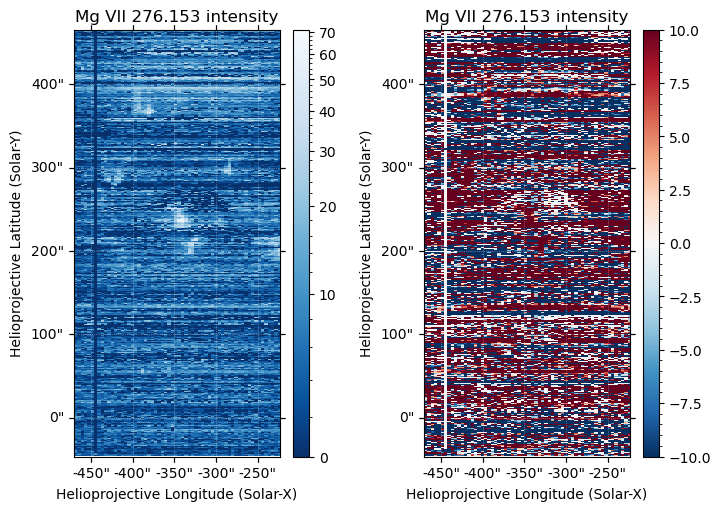

In [16]:
plot_dhb_int_and_vel(mg_07_276_1c_fitpath)

Reading fit result from, 
   ../../src/EIS/DHB_007_v2/20221025T0023/eis_20221025_014811.mg_07_280_737.1c-0.fit.h5


/home/yjzhu/anaconda3/envs/sunpy/lib/python3.11/site-packages/eispac/core/eisfitresult.py:427: RuntimeWarning: invalid value encountered in divide
  rel_error = obs_errs/obs_cent


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


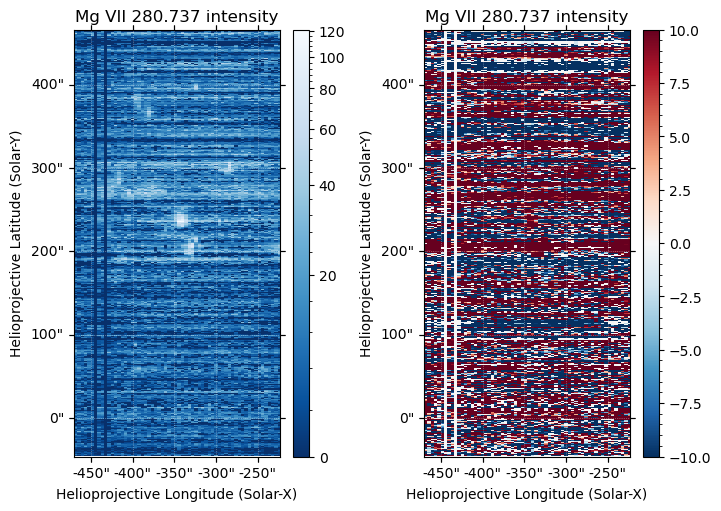

In [17]:
plot_dhb_int_and_vel(mg_07_280_1c_fitpath)

In [18]:
eis_auto_fit_sav = readsav("../../src/EIS/DHB_007_v2/20221025T0023/idl_l0_l1/eis_auto_fit_res_fe08_09_10.sav",verbose=True)

--------------------------------------------------
Date: Wed Jan 31 04:52:51 2024
User: yjzhu
Host: NB-RES-YINGJIE
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: linux
IDL Version: 8.8.3
--------------------------------------------------
Successfully read 6 records of which:
 - 3 are of type VARIABLE
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - vel_feviii_185 [<class 'numpy.ndarray'>]
 - vel_feix_197 [<class 'numpy.ndarray'>]
 - vel_fex_184 [<class 'numpy.ndarray'>]
--------------------------------------------------


In [19]:
eis_auto_fit_vel_fe_09_197 = eis_auto_fit_sav["vel_feix_197"]
eis_auto_fit_vel_fe_09_197 = eis_auto_fit_vel_fe_09_197 - np.nanmedian(eis_auto_fit_vel_fe_09_197,axis=0)[np.newaxis,:]
eis_auto_fit_vel_fe_08_185 = eis_auto_fit_sav["vel_feviii_185"]
eis_auto_fit_vel_fe_08_185 = eis_auto_fit_vel_fe_08_185 - np.nanmedian(eis_auto_fit_vel_fe_08_185,axis=0)[np.newaxis,:]
eis_auto_fit_vel_fe_10_184 = eis_auto_fit_sav["vel_fex_184"]
eis_auto_fit_vel_fe_10_184 = eis_auto_fit_vel_fe_10_184 - np.nanmedian(eis_auto_fit_vel_fe_10_184,axis=0)[np.newaxis,:]

In [20]:
fe_09_197_velmap.meta

MetaDict([('bunit', 'km/s'),
          ('cdelt1', 3.9935998916625977),
          ('cdelt2', 1.0),
          ('cname1', 'Solar-X'),
          ('cname2', 'Solar-Y'),
          ('crpix1', 1),
          ('crpix2', 1),
          ('crval1', -468.8468542098999),
          ('crval2', -63.4544677734375),
          ('ctype1', 'HPLN-TAN'),
          ('ctype2', 'HPLT-TAN'),
          ('cunit1', 'arcsec'),
          ('cunit2', 'arcsec'),
          ('date_avg', '2022-10-25T02:20:09.500'),
          ('date_beg', '2022-10-25T01:48:11.000'),
          ('date_end', '2022-10-25T02:52:08.000'),
          ('date_obs', '2022-10-25T01:48:11.000'),
          ('dsun_obs', 148785901835.22205),
          ('fovx', 247.60319328308105),
          ('fovy', 512.0),
          ('hgln_obs', 0.0),
          ('hglt_obs', 5.069302463150239),
          ('instrume', 'EIS'),
          ('line_id', 'Fe IX 197.862'),
          ('measrmnt', 'velocity'),
          ('naxis', 2),
          ('naxis1', 62),
          ('naxis2', 512),


In [21]:
eis_auto_fit_fe_09_197_map_meta = deepcopy(fe_09_197_velmap.meta)

In [22]:
eis_auto_fit_fe_09_197_map_meta['cdelt2'] = 4.0
eis_auto_fit_fe_09_197_map_meta['naxis2'] = 128
eis_auto_fit_fe_09_197_map_meta['crval2'] = eis_auto_fit_fe_09_197_map_meta['crval2'] + 1.5*eis_auto_fit_fe_09_197_map_meta['cdelt2']

In [23]:
eis_auto_fit_fe_09_197_velmap = sunpy.map.Map(eis_auto_fit_vel_fe_09_197, eis_auto_fit_fe_09_197_map_meta)
eis_auto_fit_fe_09_197_velmap.plot_settings["norm"] = plt.Normalize(vmin=-15,vmax=15)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


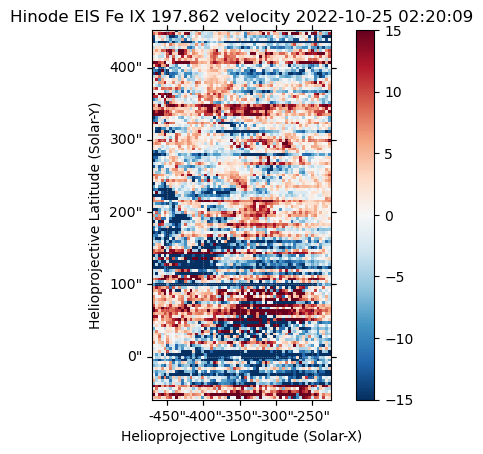

In [24]:
eis_auto_fit_fe_09_197_velmap.plot()
plt.colorbar()

In [25]:
eis_auto_fit_fe_10_184_map_meta = deepcopy(fe_10_184_velmap.meta)

In [26]:
eis_auto_fit_fe_10_184_map_meta['cdelt2'] = 4.0
eis_auto_fit_fe_10_184_map_meta['naxis2'] = 128
eis_auto_fit_fe_10_184_map_meta['crval2'] = eis_auto_fit_fe_10_184_map_meta['crval2'] + 1.5*eis_auto_fit_fe_10_184_map_meta['cdelt2']

In [27]:
eis_auto_fit_fe_10_184_map = sunpy.map.Map(eis_auto_fit_vel_fe_10_184, eis_auto_fit_fe_10_184_map_meta)
eis_auto_fit_fe_10_184_map.plot_settings["norm"] = plt.Normalize(vmin=-15,vmax=15)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


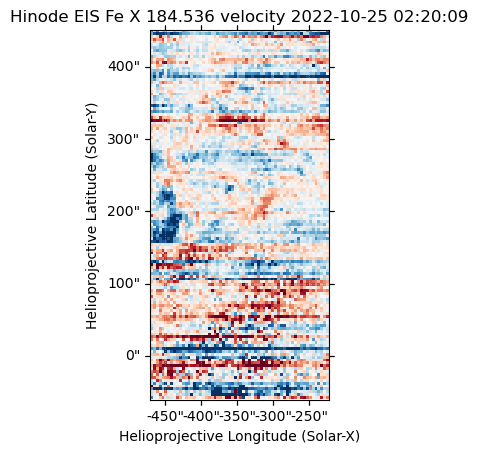

In [28]:
eis_auto_fit_fe_10_184_map.plot()

In [33]:
eis_auto_fit_fe_10_184_map.save("../../src/EIS/DHB_007_v2/20221025T0023/sunpymaps/eis_auto_fit_184_velmap.fits",overwrite=True)

In [29]:
eis_auto_fit_fe_08_185_map_meta = deepcopy(fe_08_185_velmap.meta)

In [30]:
eis_auto_fit_fe_08_185_map_meta['cdelt2'] = 4.0
eis_auto_fit_fe_08_185_map_meta['naxis2'] = 128
eis_auto_fit_fe_08_185_map_meta['crval2'] = eis_auto_fit_fe_08_185_map_meta['crval2'] + 1.5*eis_auto_fit_fe_08_185_map_meta['cdelt2']

In [31]:
eis_auto_fit_fe_08_185_map = sunpy.map.Map(eis_auto_fit_vel_fe_08_185, eis_auto_fit_fe_08_185_map_meta)
eis_auto_fit_fe_08_185_map.plot_settings["norm"] = plt.Normalize(vmin=-20,vmax=20)

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


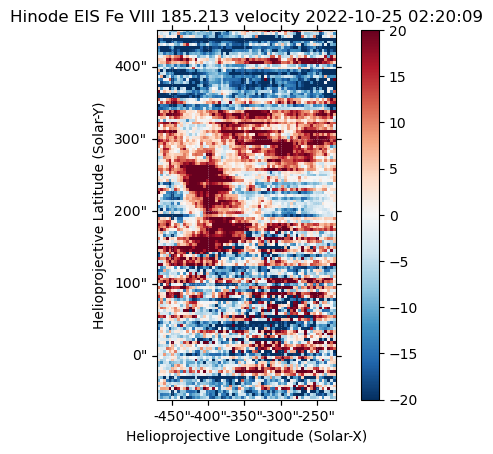

In [32]:
eis_auto_fit_fe_08_185_map.plot()
plt.colorbar()